<a href="https://colab.research.google.com/github/samer-glitch/Leveraging-Machine-Learning-for-Identifying-and-Classifying-Cyber-Threats-in-Network-Environments/blob/main/Statistical%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv to Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv


<ipython-input-3-9baa35a9a1f0>:9: DtypeWarning: Columns (0,2,4,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-200000rows(ALLFEATURES).csv')


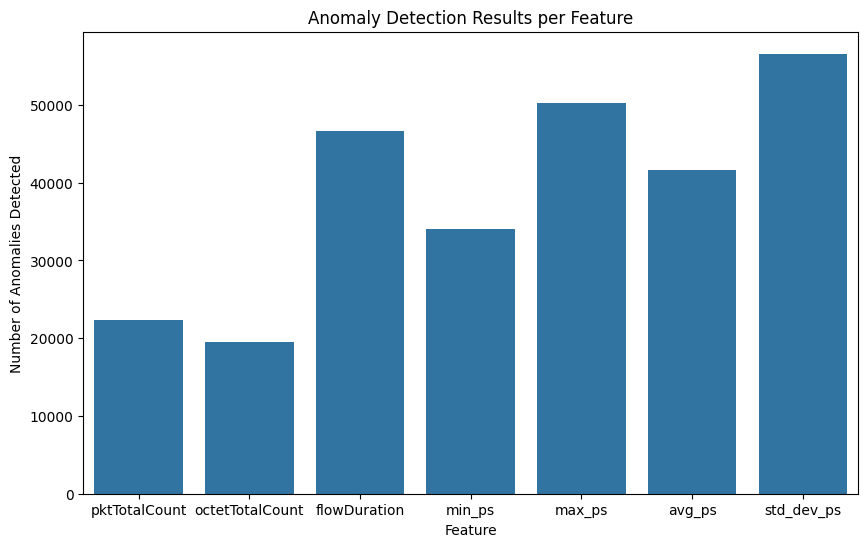

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-200000rows(ALLFEATURES).csv')

# Select key features
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']
data = df[key_features]

# Handling NaN values by filling them with the median
data_filled = data.fillna(data.median())

# Initialize StandardScaler
scaler = StandardScaler()

# Initialize Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Dictionary to store anomalies for each feature
feature_anomalies = {}

# Standardizing and detecting anomalies for each feature individually
for feature in key_features:
    # Standardizing the feature
    feature_data = data_filled[[feature]].values  # Reshape for single feature
    feature_data_scaled = scaler.fit_transform(feature_data)

    # Training Isolation Forest on the feature
    isolation_forest.fit(feature_data_scaled)

    # Identifying anomalies
    feature_predictions = isolation_forest.predict(feature_data_scaled)
    feature_anomalies[feature] = np.sum(feature_predictions == -1)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(feature_anomalies.keys()), y=list(feature_anomalies.values()))
plt.title('Anomaly Detection Results per Feature')
plt.xlabel('Feature')
plt.ylabel('Number of Anomalies Detected')
plt.show()


<ipython-input-7-1c40c7f8cfa9>:9: DtypeWarning: Columns (0,2,4,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-200000rows(ALLFEATURES).csv')


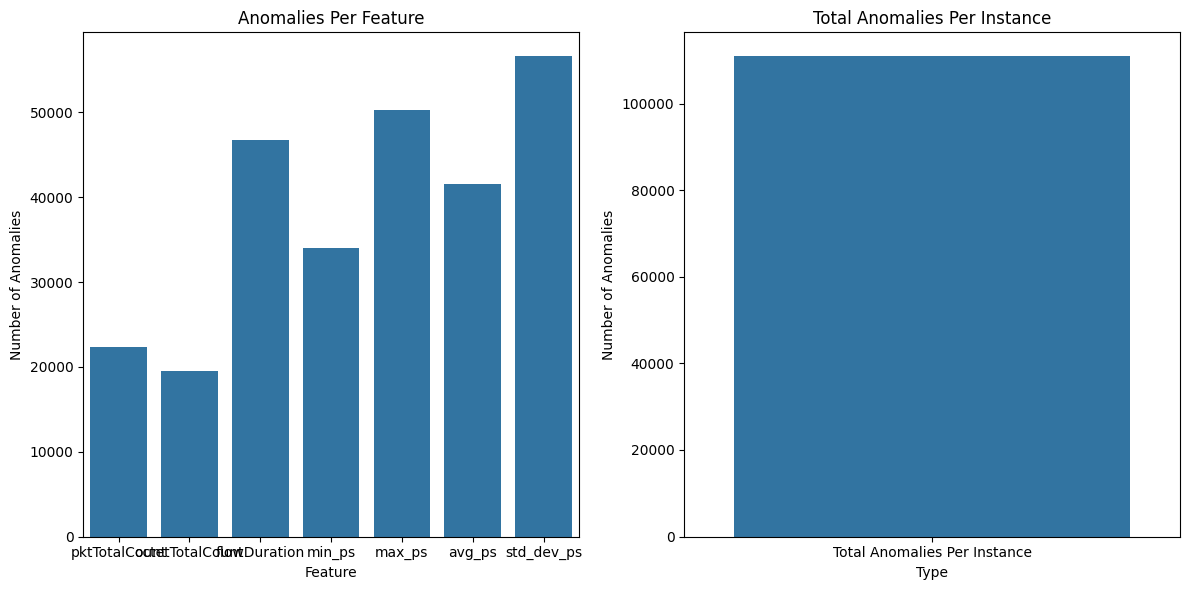

110918

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-200000rows(ALLFEATURES).csv')

# Initialize Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Dictionary to store anomaly predictions for each feature
feature_anomalies = {}
feature_predictions_dict = {}

# Detecting anomalies for each feature
for feature in key_features:
    feature_data = data_filled[[feature]].values  # Reshape for single feature
    feature_data_scaled = scaler.fit_transform(feature_data)
    isolation_forest.fit(feature_data_scaled)
    feature_predictions = isolation_forest.predict(feature_data_scaled)
    feature_predictions_dict[feature] = feature_predictions
    feature_anomalies[feature] = np.sum(feature_predictions == -1)

# Aggregating anomaly labels per instance
anomalous_instances = np.zeros(len(data_filled), dtype=bool)
for feature in key_features:
    anomalous_instances = np.logical_or(anomalous_instances, feature_predictions_dict[feature] == -1)

# Counting the total number of anomalous instances
total_anomalous_instances = np.sum(anomalous_instances)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting anomalies per feature
plt.subplot(1, 2, 1)
sns.barplot(x=list(feature_anomalies.keys()), y=list(feature_anomalies.values()))
plt.title('Anomalies Per Feature')
plt.xlabel('Feature')
plt.ylabel('Number of Anomalies')

# Plotting total anomalies per instance
plt.subplot(1, 2, 2)
sns.barplot(x=["Total Anomalies Per Instance"], y=[total_anomalous_instances])
plt.title('Total Anomalies Per Instance')
plt.xlabel('Type')
plt.ylabel('Number of Anomalies')

plt.tight_layout()
plt.show()

# Counting the total number of anomalous instances
total_anomalous_instances = np.sum(anomalous_instances)
total_anomalous_instances

<ipython-input-3-4b1de7283eee>:11: DtypeWarning: Columns (0,2,4,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


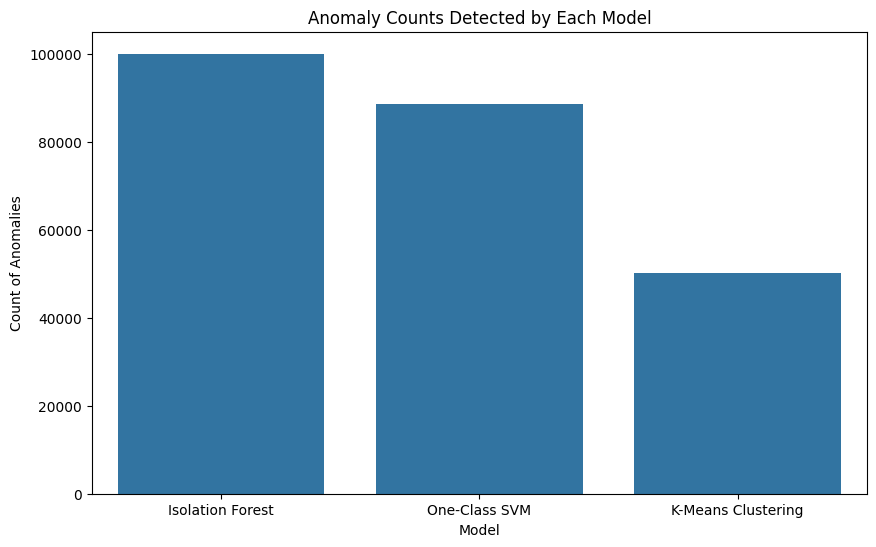

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Please replace 'file_path' with the actual path to your dataset)
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv')

# Defining the key features for anomaly detection
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']

# Handling NaN values in the dataset
data_filled = df[key_features].fillna(df[key_features].median())

# Normalizing and standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

# Training the models
isolation_forest = IsolationForest(n_estimators=100, contamination=0.5, random_state=42)
ocsvm = OneClassSVM(kernel='rbf', gamma='auto')
kmeans = KMeans(n_clusters=3, random_state=42)

isolation_forest.fit(data_scaled)
ocsvm.fit(data_scaled)
kmeans.fit(data_scaled)

# Detecting anomalies
if_anomalies = isolation_forest.predict(data_scaled) == -1
ocsvm_anomalies = ocsvm.predict(data_scaled) == -1
kmeans_distances = kmeans.transform(data_scaled)
kmeans_labels = kmeans.predict(data_scaled)
smaller_cluster = np.argmin(np.bincount(kmeans_labels))
kmeans_anomalies = kmeans_distances[:, smaller_cluster] > np.percentile(kmeans_distances[:, smaller_cluster], 50)

# Plotting the anomaly counts
anomaly_counts = {
    "Isolation Forest": np.sum(if_anomalies),
    "One-Class SVM": np.sum(ocsvm_anomalies),
    "K-Means Clustering": np.sum(kmeans_anomalies)
}

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(anomaly_counts.keys()), y=list(anomaly_counts.values()))
plt.title("Anomaly Counts Detected by Each Model")
plt.ylabel("Count of Anomalies")
plt.xlabel("Model")
plt.show()


<ipython-input-2-f0bf5d05b337>:33: DtypeWarning: Columns (0,2,4,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv')


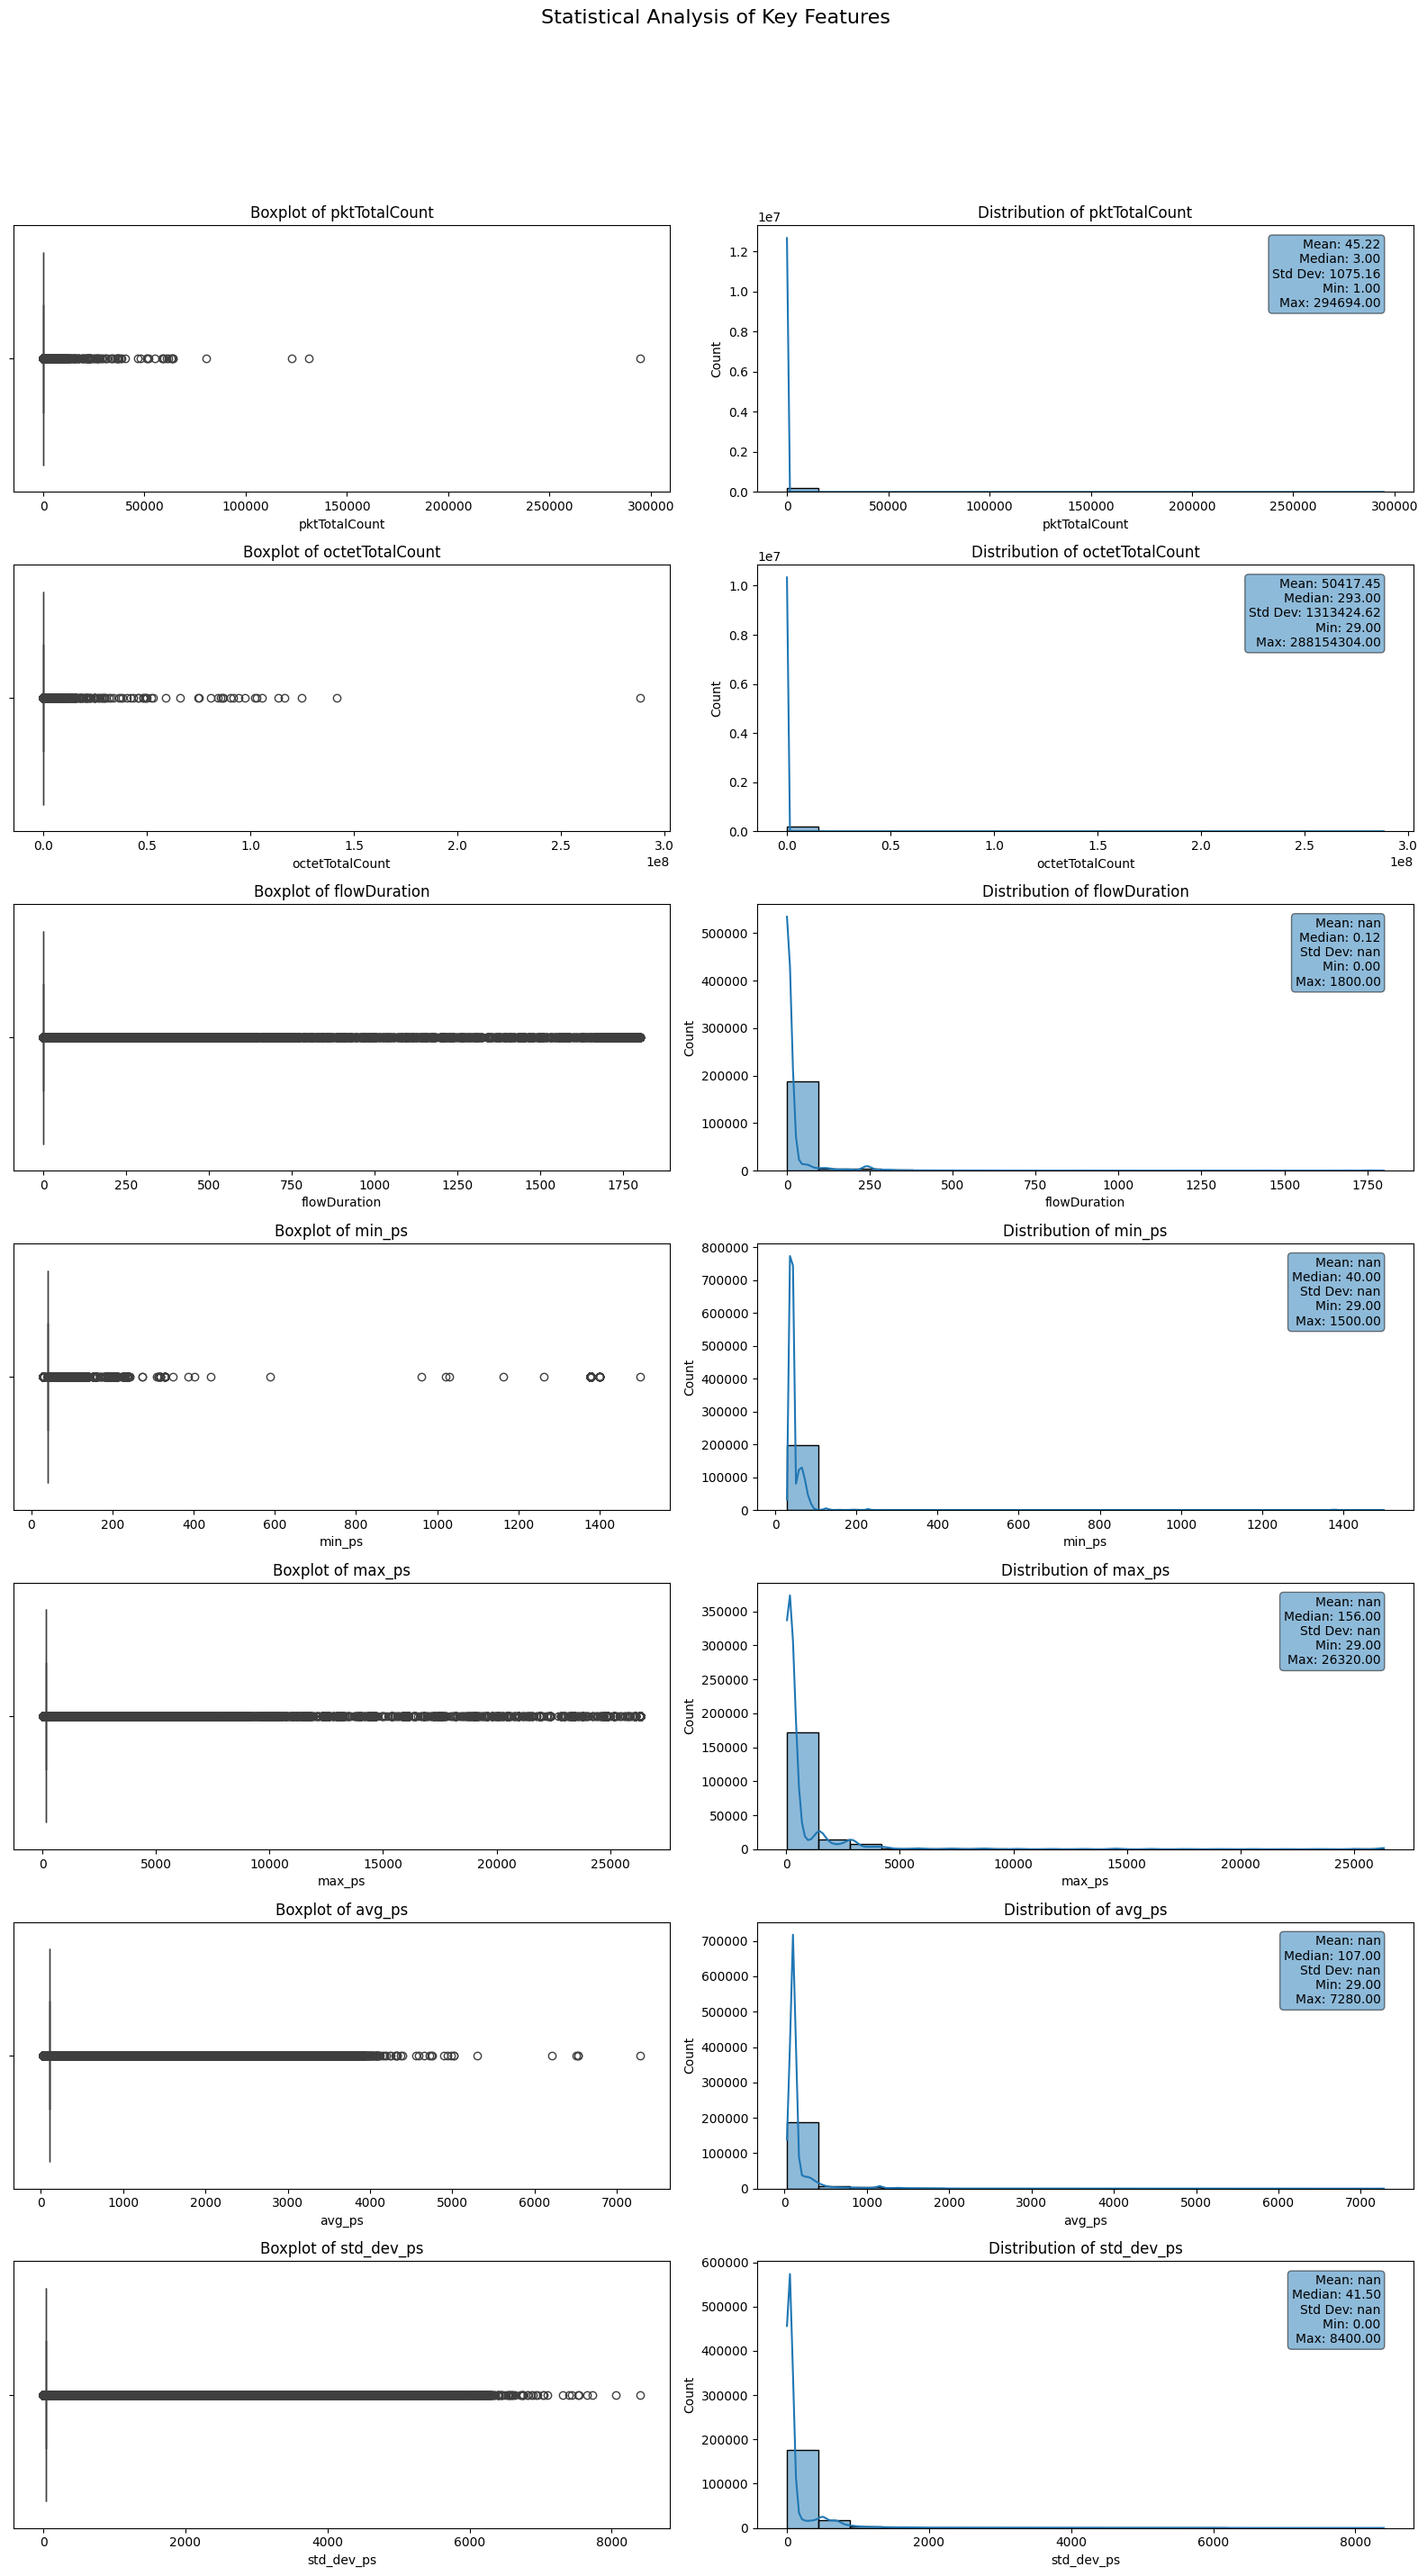

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to reduce memory usage by downcasting numerical columns
def reduce_memory_usage(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    return df

# Load your dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv')

# Reduce memory usage of the DataFrame
df = reduce_memory_usage(df)

# Select key features
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']

# Handling NaN values by filling them with the median
data_filled = df[key_features].fillna(df[key_features].median())

# Calculate statistical metrics for annotation
stats = data_filled.describe()

# Number of rows for the subplot matrix (one row per feature)
n_features = len(key_features)

# Create a figure to host all subplots
fig, axes = plt.subplots(nrows=n_features, ncols=2, figsize=(16, n_features * 4))
fig.suptitle('Statistical Analysis of Key Features', fontsize=16, y=1.02)

# Iterate through all features and plot
for i, feature in enumerate(key_features):
    # Boxplot
    sns.boxplot(x=data_filled[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {feature}')

    # Distribution plot with KDE
    sns.histplot(data_filled[feature], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {feature}')

    # Annotate plots with statistical metrics
    textstr = '\n'.join((
        f'Mean: {stats.at["mean", feature]:.2f}',
        f'Median: {stats.at["50%", feature]:.2f}',
        f'Std Dev: {stats.at["std", feature]:.2f}',
        f'Min: {stats.at["min", feature]:.2f}',
        f'Max: {stats.at["max", feature]:.2f}'))
    # Position text in distribution plot for clarity
    axes[i, 1].text(0.95, 0.95, textstr, transform=axes[i, 1].transAxes, verticalalignment='top', horizontalalignment='right', fontsize=10, bbox=dict(boxstyle="round", alpha=0.5))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


<ipython-input-5-f1e9544e4021>:5: DtypeWarning: Columns (0,2,4,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv')
<ipython-input-5-f1e9544e4021>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


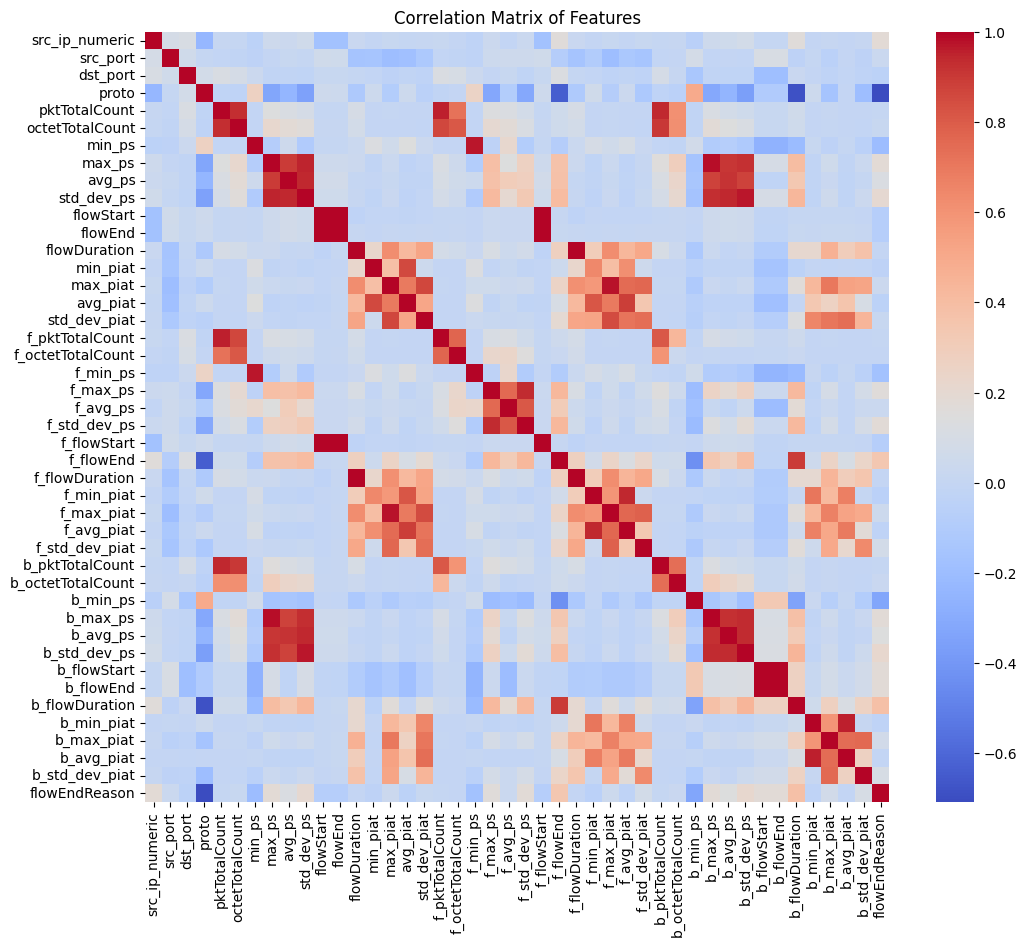

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv')

# Correlation matrix calculation
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()
